In [1]:
from PIL import Image
import pytesseract
from pytesseract import image_to_string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from time import sleep
import glob
import urllib
import pyautogui as pag
import re
import copy
#import
%matplotlib inline

# Aim: To analyse the last statements, characteristics of the death row inmates

# Source : http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html



# tesseract testing to check the ocr's accuracy

In [7]:
x = Image.open('/media/radial/Work/Work/Work on datasets/Texas DR/trottiewillie.jpeg')

In [8]:
pytesseract.image_to_string(x)

"ﬂame: Willie Tyrone Trottie n.n. 9 999055\n\n \n\n \n\n \n\n \n\n.DDB; 9 I a / 59 Received: 12 l l5/93 Age: 24 (when rec'd)’\nCnunty- Harris Date of nffense:i/;I 93\nAge at time of nffense: 23 Rice: black Height‘ 5.5\n'ueigh 147 Eyes: brown Mair black\nNitive County: Harris r state. Texas\nPrior ﬂccupation: dellverxman Education level: 9 years\n\nPrior prison record:\nNone. Received deterred adjudicatlon after being convicted of theft\n\nin septembor l99o and sentenced to 5 years in prison.\n\n \n\n \n\nSummary; ConVioted in the murders of Barbara Noll Canada 24 and her\n\nbrother, Titus cl Canada, 29l Both were Victims of a shooting ramoaqe\n\nthat also left their mother and sister woundcdl Trottie and Barbara\n\nCanada were lovers prior to their breakup in September 1992. Trottie\n\nwho had a protective court order against him threatened to kill Canada\n\nif she did not return to him by May 1, 1993, Two da s later he kicked\n\nin the door to where Canada was staxlﬂg with her mother 

# Web scrapping to store the last statements

In [ ]:
# open the site and click on the box
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')

for i in range(542):
    try:
        x = 542-i
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+2)+']/td[3]/a') 
        element.click()
        felement = driver.find_element_by_xpath('//*[@id="body"]/p[4]')
        name = felement.get_attribute("innerHTML")
        felement = driver.find_element_by_xpath('//*[@id="body"]/p[6]')
        statement = felement.get_attribute("innerHTML")
        file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/"+str(x)+", "+name+".txt",'w') 
        file.write(statement)
        file.close()
        driver.back()
        sleep(2)
    except NoSuchElementException:
        file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/"+str(x)+", "+"No statement"".txt",'w') 
        file.write("No statement")
        file.close()
        driver.back()
    
driver.close()

# Cleaning data scrapping errors

In [84]:
x = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/*Offend*.txt")
y = []
for i in x:
    y.append(i[-18:-15])
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in y:  
    try:
        #x = 542-int(i)
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(int(i))+']/td[3]/a') 
        element.click()
        felement = driver.find_element_by_xpath('//*[@id="body"]/p[4]')
        name = felement.get_attribute("innerHTML")
        felement = driver.find_element_by_xpath('//*[@id="body"]/p[6]')
        statement = felement.get_attribute("innerHTML")
        file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/offenders/"+str(i)+", "+name+".txt",'w') 
        file.write(statement)
        file.close()
        driver.back()
        sleep(2)
    except NoSuchElementException:
        file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/offenders/"+str(i)+", "+"No statement"".txt",'w') 
        file.write("No statement")
        file.close()
        driver.back()
    
driver.close()

# Web scrapping to store the information

driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
summary=[]
img = []
for i in range(10):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            img.append(x)
            driver.back()
        else:
            url = x
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            data = str(data)
            exp = 'Incident.*\s*.*\s.*Co-Defendants'
            pattern = re.compile(exp)
            details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    except NoSuchElementException:
        ""
print(len(img)+len(summary))

In [ ]:
summary=[]
img = []
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in range(542):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            img.append(x)
            y = copy.copy(x)
            urllib.request.urlretrieve(x, "/media/radial/Work/Work/Work on datasets/Texas DR/Info/"+str(543-i)+", "+str(y).strip("http://www.tdcj.state.tx.us/death_row/dr_info/"))
            driver.back()
        else:
            url = x
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            details = str(data)
            #exp = 'Incident.*\s*.*\s.*Co-Defendants'
            #pattern = re.compile(exp)
            #details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    
    except NoSuchElementException:
        ""
    print(i, 542-i)

In [306]:
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in range(346,542):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            img.append(x)
            y = copy.copy(x)
            urllib.request.urlretrieve(x, "/media/radial/Work/Work/Work on datasets/Texas DR/Info/"+str(543-i)+", "+str(y).strip("http://www.tdcj.state.tx.us/death_row/dr_info/"))
            driver.back()
        else:
            url = x
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            details = str(data)
            #exp = 'Incident.*\s*.*\s.*Co-Defendants'
            #pattern = re.compile(exp)
            #details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    
    except NoSuchElementException:
        ""
    print(i, 542-i)

346 196
347 195
348 194
349 193
350 192
351 191
352 190
353 189
354 188
355 187
356 186
357 185
358 184
359 183
360 182
361 181
362 180
363 179
364 178
365 177
366 176
367 175
368 174
369 173
370 172
371 171
372 170
373 169
374 168
375 167
376 166
377 165
378 164
379 163
380 162
381 161
382 160
383 159
384 158
385 157
386 156
387 155
388 154
389 153
390 152
391 151
392 150
393 149
394 148
395 147
396 146
397 145
398 144
399 143
400 142
401 141
402 140
403 139
404 138
405 137
406 136
407 135
408 134
409 133
410 132
411 131
412 130
413 129
414 128
415 127
416 126
417 125
418 124
419 123
420 122
421 121
422 120
423 119
424 118
425 117
426 116
427 115
428 114
429 113
430 112
431 111
432 110
433 109
434 108
435 107
436 106
437 105
438 104
439 103
440 102
441 101
442 100
443 99
444 98
445 97
446 96
447 95
448 94
449 93
450 92
451 91
452 90
453 89
454 88
455 87
456 86
457 85
458 84
459 83
460 82
461 81
462 80
463 79
464 78
465 77
466 76
467 75
468 74
469 73
470 72
471 71
472 70
473 69
474 68


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=58.0.3029.110)
  (Driver info: chromedriver=2.27.440175 (9bc1d90b8bfa4dd181fbbf769a5eb5e575574320),platform=Linux 4.4.0-79-generic x86_64)


In [308]:
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in range(499,542):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            img.append(x)
            y = copy.copy(x)
            urllib.request.urlretrieve(x, "/media/radial/Work/Work/Work on datasets/Texas DR/Info/"+str(543-i)+", "+str(y).strip("http://www.tdcj.state.tx.us/death_row/dr_info/"))
            driver.back()
        else:
            url = x
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            details = str(data)
            #exp = 'Incident.*\s*.*\s.*Co-Defendants'
            #pattern = re.compile(exp)
            #details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    
    except NoSuchElementException:
        ""
    print(i, 542-i)

499 43
500 42
501 41
502 40
503 39
504 38
505 37
506 36
507 35
508 34
509 33
510 32
511 31
512 30
513 29
514 28
515 27
516 26
517 25
518 24
519 23
520 22
521 21
522 20
523 19
524 18
525 17
526 16
527 15
528 14
529 13
530 12
531 11
532 10
533 9
534 8
535 7
536 6
537 5
538 4
539 3
540 2
541 1


In [309]:
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in range(541,543):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            img.append(x)
            y = copy.copy(x)
            urllib.request.urlretrieve(x, "/media/radial/Work/Work/Work on datasets/Texas DR/Info/"+str(543-i)+", "+str(y).strip("http://www.tdcj.state.tx.us/death_row/dr_info/"))
            driver.back()
        else:
            url = x
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            details = str(data)
            #exp = 'Incident.*\s*.*\s.*Co-Defendants'
            #pattern = re.compile(exp)
            #details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    
    except NoSuchElementException:
        ""
    print(i, 542-i)

541 1
542 0


Lost summary , recovering

In [27]:
summary=[]
driver = webdriver.Chrome('/media/radial/Work/BDAP/Project/rCH/chromedriver')
driver.maximize_window()
driver.get('http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html')
for i in range(490,543):
    try:
        num = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[1]')
        element = driver.find_element_by_xpath('//*[@id="body"]/table/tbody/tr['+str(i+1)+']/td[2]/a') 
        element.click()
        x = driver.current_url
        if(x[-3:]=="jpg"):
            driver.back()
        else:
            url = x
            y = copy.copy(x)
            user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
            headers={'User-Agent':user_agent,} 
            request=urllib.request.Request(url,None,headers) 
            response = urllib.request.urlopen(request)
            data = response.read()
            details = str(data)
            file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/"+str(543-i)+" , "+str(y).strip("http://www.tdcj.state.tx.us/death_row/dr_info/").strip(".html")+".txt",'w') 
            file.write(details)
            file.close()
            #exp = 'Incident.*\s*.*\s.*Co-Defendants'
            #pattern = re.compile(exp)
            #details = re.findall(pattern,data)
            summary.append(details)
            driver.back()
    
    except NoSuchElementException:
        ""
    print(i, 542-i)

490 52
491 51
492 50
493 49
494 48
495 47
496 46
497 45
498 44
499 43
500 42
501 41
502 40
503 39
504 38
505 37
506 36
507 35
508 34
509 33
510 32
511 31
512 30
513 29
514 28
515 27
516 26
517 25
518 24
519 23
520 22
521 21
522 20
523 19
524 18
525 17
526 16
527 15
528 14
529 13
530 12
531 11
532 10
533 9
534 8
535 7
536 6
537 5
538 4
539 3
540 2
541 1
542 0


# Cleaning info from text

In [ ]:
#Need to add columns like DOB,state county etc

In [271]:
info = open("/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/506 , yowellmichae.txt","r").read()
info

'b\'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\\r\\n<html lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml"><!-- InstanceBegin template="/Templates/sub_dr_template.dwt" codeOutsideHTMLIsLocked="false" -->\\r\\n<head>\\r\\n<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" />\\r\\n\\r\\n<link href="../../stylesheets/sub_css.css" rel="stylesheet" type="text/css" />\\r\\n\\r\\n<!-- InstanceBeginEditable name="DCMetaTags" -->\\r\\n<meta name="DC.Title" content="Texas Department of Criminal Justice" /> \\r\\n<meta name="DC.Creator" content="Texas Department of Criminal Justice" /> \\r\\n<meta name="DC.Date" content="20000302" /> \\r\\n<meta name="DC.Format.MIME" content="text/html" />\\r\\n<meta name="DC.Format.SysReq" content="Internet browser" /> \\r\\n<meta name="DC.Identifier" content="http://www.tdcj.texas.gov/" /> \\r\\n<meta name="DC.Subject" content="criminal justice,

In [293]:
exp =  'right_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_headers = re.findall(pattern,info)
new_headers

['right_deathrow">Name</td>\\r\\n    <',
 'right_deathrow">TDCJ Number<',
 'right_deathrow">Date of Birth<',
 'right_deathrow">Date Received<',
 'right_deathrow">Age (when    Received)<',
 'right_deathrow">Education Level (Highest Grade Completed)<',
 'right_deathrow">Date of Offense<',
 'right_deathrow">Age (at the time    of Offense)<',
 'right_deathrow">County</td>\\r\\n    <',
 'right_deathrow">Race</td>\\r\\n    <',
 'right_deathrow">Gender</td>\\r\\n    <',
 'right_deathrow">Hair Color<',
 'right_deathrow">Height</td>\\r\\n    <',
 'right_deathrow">Weight</td>\\r\\n    <',
 'right_deathrow">Eye Color<',
 'right_deathrow">Native County<',
 'right_deathrow">Native State<']

In [294]:
new_headers= [i.strip("'right_deathrow\">").strip("</td>\\r\\n    <',").strip("<") for i in new_headers]
new_headers

['Name',
 'TDCJ Numbe',
 'Date of Birth',
 'Date Receive',
 'Age (when    Received)',
 'Education Level (Highest Grade Completed)',
 'Date of Offense',
 'Age (at the time    of Offense)',
 'County',
 'Race',
 'Gende',
 'Hair Colo',
 'Heigh',
 'Weigh',
 'Eye Colo',
 'Native County',
 'Native State']

In [312]:
exp =  '"text_bold".\S*.*?<'
pattern = re.compile(exp)
extra_headers = re.findall(pattern,info)
extra_headers

['"text_bold">Prior Occupation<',
 '"text_bold">Prior Prison Record<',
 '"text_bold">Summary of Incident<',
 '"text_bold">Co-Defendants</span> <',
 '"text_bold">Race and Gender of Victim<']

In [320]:
extra_headers = [i.strip("\"text_bold\">").strip("<").strip("</span> ") for i in extra_headers]
headers = new_headers+extra_headers
headers

['Name',
 'TDCJ Numbe',
 'Date of Birth',
 'Date Receive',
 'Age (when    Received)',
 'Education Level (Highest Grade Completed)',
 'Date of Offense',
 'Age (at the time    of Offense)',
 'County',
 'Race',
 'Gende',
 'Hair Colo',
 'Heigh',
 'Weigh',
 'Eye Colo',
 'Native County',
 'Native State',
 'Prior Occupati',
 'Prior Prison Recor',
 'Summary of Inci',
 'Co-Defend',
 'Race and Gender of Victim']

In [321]:
dum = list(range(22*22))
dum = np.reshape(dum,(22,22))

In [405]:
new_df = pd.DataFrame(dum, columns=headers)
new_df.drop(range(21),axis = 0, inplace=True)
new_df.head()

Name  TDCJ Numbe  Date of Birth  Date Receive  Age (when    Received)  \
21   462         463            464           465                     466   

    Education Level (Highest Grade Completed)  Date of Offense  \
21                                        467              468   

    Age (at the time    of Offense)  County  Race            ...              \
21                              469     470   471            ...               

    Heigh  Weigh  Eye Colo  Native County  Native State  Prior Occupati  \
21    474    475       476            477           478             479   

    Prior Prison Recor  Summary of Inci  Co-Defend  Race and Gender of Victim  
21                 480              481        482                        483  

[1 rows x 22 columns]

In [402]:
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols

['left_deathrow">Jackson, James Lewis <',
 'left_deathrow">999272</td>\\r\\n  <',
 'left_deathrow">6/13/59</td>\\r\\n  <',
 'left_deathrow">6/17/98 <',
 'left_deathrow">39</td>\\r\\n  <',
 'left_deathrow">12 years <',
 'left_deathrow">4/8/97 <',
 'left_deathrow">37</td>\\r\\n  <',
 'left_deathrow">Harris</td>\\r\\n  <',
 'left_deathrow">Black <',
 'left_deathrow">Male</td>\\r\\n  <',
 'left_deathrow">Black</td>\\r\\n  <',
 'left_deathrow">6\\\' 3&quot; <',
 'left_deathrow">204</td>\\r\\n  <',
 'left_deathrow">Brown</td>\\r\\n  <',
 'left_deathrow">Harris <',
 'left_deathrow">Texas</td>\\r\\n  <']

In [279]:
exp =  'span. <br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols

['span> <br />\\r\\nSteel  Fabrication, Cook, Laborer </p>',
 'span> <br />\\r\\n  #505775,  8-year sentence for 1 count of Possession of a Controlled Substance; 06/16/89  released on Pre-Parole; 09/19/89 release on Parole; 02/22/97 received Clemency  Discharge. </p>',
 "span> <br />\\r\\n  On  05/19/98 in Lubbock, Texas, Yowell shot his father, strangled his  mother with a cord, and set fire to their house. The victim\\'s grandmother died  several days later from injuries sustained because she was disabled and unable  to get out of the house. </p>",
 'span> <br />\\r\\n  None </p>',
 'span> <br />\\r\\n  White  male and 2 white females </p>']

In [329]:
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
cols

['Yowell, Michael J.',
 '999334',
 '01/25/1970',
 '11/23/1999',
 '29',
 '12',
 '05/09/1998',
 '28',
 'Lubbock',
 'White',
 'Male',
 'Brow',
 "5\\' 9&quot;",
 '188',
 'Hazel',
 'Lubbock',
 'Tex',
 'Steel  Fabrication, Cook, Labore',
 '#505775,  8-year sentence for 1 count of Possession of a Controlled Substance; 06/16/89  released on Pre-Parole; 09/19/89 release on Parole; 02/22/97 received Clemency  Discharge.',
 "On  05/19/98 in Lubbock, Texas, Yowell shot his father, strangled his  mother with a cord, and set fire to their house. The victim\\'s grandmother died  several days later from injuries sustained because she was disabled and unable  to get out of the house.",
 'None',
 'White  male and 2 white female']

In [331]:
new_df.ix[22] = cols
new_df

Name TDCJ Numbe Date of Birth Date Receive  \
21                 462        463           464          465   
22  Yowell, Michael J.     999334    01/25/1970   11/23/1999   

   Age (when    Received) Education Level (Highest Grade Completed)  \
21                    466                                       467   
22                     29                                        12   

   Date of Offense Age (at the time    of Offense)   County   Race  \
21             468                             469      470    471   
22      05/09/1998                              28  Lubbock  White   

                 ...                      Heigh Weigh Eye Colo Native County  \
21               ...                        474   475      476           477   
22               ...                5\' 9&quot;   188    Hazel       Lubbock   

   Native State                    Prior Occupati  \
21          478                               479   
22          Tex  Steel  Fabrication, Cook, Labore   

                                   Prior Prison Recor  \
21                                                480   
22  #505775,  8-year sentence for 1 count of Posse...   

                                      Summary of Inci Co-Defend  \
21                                                481       482   
22  On  05/19/98 in Lubbock, Texas, Yowell shot hi...      None   

         Race and Gender of Victim  
21                             483  
22  White  male and 2 white female  

[2 rows x 22 columns]

In [403]:
def extra_col_add(file,i):
        info = open(file,"r").read()
        info

        exp =  'left_deathrow".\S*.*?<'
        pattern = re.compile(exp)
        new_cols = re.findall(pattern,info)
        new_cols

        exp =  'span. <br.*?<\/p>'
        pattern = re.compile(exp)
        extra_cols = re.findall(pattern,info)
        extra_cols

        cols = new_cols+extra_cols
        cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
        cols
        
        new_df.ix[22+i] = cols

In [404]:
z = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/*txt")
i = 1
try:
    for file in z:
        if ("vailable" not in file):
            extra_col_add(file,i)
            i=i+1
except ValueError:
    ""
new_df

Name TDCJ Numbe Date of Birth Date Receive  \
21                  462        463           464          465   
23  Brooks, Charlie Jr.        592      9/1/1942    4/25/1978   
24       Clifford Bogge        887     6/11/1965   10/23/1987   

   Age (when    Received) Education Level (Highest Grade Completed)  \
21                    466                                       467   
23                     35                                        12   
24                     22                                        12   

   Date of Offense Age (at the time    of Offense)  \
21             468                             469   
23      12/14/1976                              34   
24       7/23/1986                              21   

                                  County   Race            ...             \
21                                   470    471            ...              
23                                     T  Black            ...              
24  Clay (change of venue from Montague)  White            ...              

          Heigh Weigh                        Eye Colo Native County  \
21          474   475                             476           477   
23  5\' 9&quot;   150  mar (according to DPS records)             T   
24  6\' 2&quot;   232                            Brow     Brunswick   

   Native State                   Prior Occupati  \
21          478                              479   
23          Tex                           Labore   
24       Georgi  carpenter\'s  helper, bookkeepe   

                                   Prior Prison Recor  \
21                                                480   
23  Federal  Prison, Leavenworth,  Illegal Possess...   
24  #441810  on a life sentence for Murder from Gr...   

                                      Summary of Inci      Co-Defend  \
21                                                481            482   
23  Brooks  went to a car lot under the pretense o...  Woody  Loudre   
24  Boggess  murdered the 86 year old white male o...           None   

   Race and Gender of Victim  
21                       483  
23               White  Male  
24               White  Male  

[3 rows x 22 columns]

Looks like the format of html is not the same so might need to make more than one function

In [430]:
#def extra_col_add(file,i):
#i=24
tt = []
ss = []
to = []
zero = []
for i in range(164):
    z = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/*txt")
    info = open(z[i],"r").read()
    info

    exp =  'left_deathrow".\S*.*?<'
    pattern = re.compile(exp)
    new_cols = re.findall(pattern,info)
    new_cols

    exp =  '\/span.\s*<br.*?<\/p>'
    pattern = re.compile(exp)
    extra_cols = re.findall(pattern,info)
    extra_cols

    cols = new_cols+extra_cols
    cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
    if(len(cols)==22):
        tt.append(cols)
        new_df.ix[22+i] = cols
    if(len(cols)==21):
        to.append(cols)
    if(len(cols)==17):
        ss.append(cols)
    if(len(cols)==0):
        zero.append(cols)
    #print(cols)
    
#new_df.ix[i] = cols
#new_df

In [407]:
new_df

Name TDCJ Numbe Date of Birth Date Receive  \
21                             462        463           464          465   
22             Brooks, Charlie Jr.        592      9/1/1942    4/25/1978   
25                  Clifford Bogge        887     6/11/1965   10/23/1987   
28               Autry, James Davi        670     9/27/1954   10/10/1980   
30            Hughes, Billy George     000556    01/28/1952   09/17/1976   
31          Hernandez, Ramon Pedro        667    03/02/1942   09/30/1980   
32            Flores, Miguel Angel     000983      06/07/69   09/14/1990   
34             Santellan, Jose Sr.     999140    03/08/1962   03/14/1995   
35             Baltazar, John Rich     999257        5/9/72      3/13/98   
36            Williams, Richard He     999251       7/19/69       1/7/98   
37                  Clay, Keith Be     999238       2/18/68      9/10/97   
38          Black, Sr., Christophe     999277        8/2/59      8/11/98   
39                Larry Allen Haye     999358    11/23/1948    5/26/2000   
40                 Matthews, Ynobe     999387    04/14/1976   06/19/2001   
41               Cotton, Marcus B.     999252       9/28/74       2/4/98   
42            Morrow, Robert Brice     999244       6/03/57     11/18/97   
43   McWilliams, Frederick Patrick     999242       12/1/73      10/1/97   
44                    Porter, Jame     999378     8/15/1971    3/14/2001   
45           Pursley, Lonnie Wayne     999294    09/17/1961   01/20/1999   
46              Martinez, Alexande     999438    06/16/1976   01/07/2003   
47              Garza, Jr., Manuel     999434    08/08/1980   11/08/2002   
48        Charles, Derrick Dewayne     999451    09/06/1982   05/27/2003   
49             Russeau, Gregory Ly     999430    10/11/1969   10/15/2002   
51              Garcia, Juan Marti     999360     2/18/1980    6/21/2000   
53                Escamilla, Licho     999432    07/03/1982   11/01/2002   
54            Holiday, Raphael Deo     999419    07/20/1979   06/21/2002   
55         Masterson, Richard Alle     999414    03/05/1972   05/15/2002   
56                   Freeman, Jame     999539    11/12/1980   11/10/2008   
57             Wesbrook, Coy Wayne     999281        2/1/58       9/2/98   
58                Ward, Adam Kelly     999525    08/11/1982   06/27/2007   
..                             ...        ...           ...          ...   
154              Nealy, Charles A.     999289       3/23/64     12/10/98   
155               Gutierrez, Vince     999262       10/1/78      4/14/98   
156               Clark, James Lee     999095       5/13/68       5/4/94   
157            Dickson, Ryan Heath     999250      11/11/76     12/31/97   
158      Reyes, Gilberto Guadalupe     999352       9/19/73       4/5/00   
159                  Parr, Kenneth     999312    01/16/1980   06/07/1999   
161             Conner, Johnny Ray     999324    04/27/1975   09/09/1999   
162                    Roach, Tony     999323    11/09/1976   08/18/1999   
163           Kimmel, Clifford All     999347    07/18/1975   03/09/2000   
164       Chamberlain, Karl Eugene     999241    06/20/1970   09/25/1997   
166            Davis, Larry Donell     999316    10/09/1967   06/11/1999   
167                 Chi, Heliberto     999437    12/28/1978   11/21/2002   
168          Dorsey, Leon David IV     999359    11/17/1975    6/12/2000   
169     Rodriguez, Michael Anthony     999413    10/29/1962   05/09/2002   
170                   Ramirez, Lui     999309    06/19/1963   05/18/1999   
171            White, Melvin Wayne     999317     1/25/1950    6/21/1999   
172            Rowell, Robert Dale     999104    04/08/1955   06/03/1994   
173      Neville, Robert James Jr.     999293    10/05/1974   01/05/1999   
174                 Hughes, Tommie     999273       8/15/74      6/18/98   
175            Salazar, Robert Jr.     999303    10/24/1978   04/28/1999   
176               Herron, Jermaine     999304    01/13/1979   04/29/1999   
17

In [395]:
len(tt)

145

In [414]:
len(to)

7

In [431]:
ss[0]

['Martin, Jerry Duane',
 '999552',
 '03/28/1970',
 '02/17/2009',
 '38',
 '10th Grade',
 '09/24/2007',
 '37',
 'Leon C/V from Walke',
 'White',
 'Male',
 'Brow',
 "5\\' 9&quot;",
 '169 lbs.',
 'Brow',
 'Colli',
 'Tex']

In [432]:
ss[0].append("Construction")
ss[0].append("Prior Prison Record: TDCJ # 585762, Dallas County, 10 yr sentence from Harris County for Theft of Property $750-$20,000; released to Shock Probation; returned under TDCJ # 795994, 50 yr sentence from Collin County for Attempted Capital Murder with a Deadly Weapon, Aggravated Assault with a Deadly Weapon and Failure to Appear; incarcerated at the time of this offense")
ss[0].append("The subject and co-defendant were working in the field squad at the Wynne Unit. He took an officer\'s weapon, ran to a city parking lot and stole a City of Huntsville truck. The subject drove the truck into the horse of a female correctional officer causing her fall and resulting in her death")
ss[0].append("John Ray Faulk, Jr.")
ss[0].append("One white female")
ss

[['Martin, Jerry Duane',
  '999552',
  '03/28/1970',
  '02/17/2009',
  '38',
  '10th Grade',
  '09/24/2007',
  '37',
  'Leon C/V from Walke',
  'White',
  'Male',
  'Brow',
  "5\\' 9&quot;",
  '169 lbs.',
  'Brow',
  'Colli',
  'Tex',
  'Construction',
  'Prior Prison Record: TDCJ # 585762, Dallas County, 10 yr sentence from Harris County for Theft of Property $750-$20,000; released to Shock Probation; returned under TDCJ # 795994, 50 yr sentence from Collin County for Attempted Capital Murder with a Deadly Weapon, Aggravated Assault with a Deadly Weapon and Failure to Appear; incarcerated at the time of this offense',
  "The subject and co-defendant were working in the field squad at the Wynne Unit. He took an officer's weapon, ran to a city parking lot and stole a City of Huntsville truck. The subject drove the truck into the horse of a female correctional officer causing her fall and resulting in her death",
  'John Ray Faulk, Jr.',
  'One white female']]

In [ ]:
# adding the only ss to new _df

In [438]:
new_df.ix[186] = ss[0]
new_df

Name TDCJ Numbe Date of Birth Date Receive  \
21                             462        463           464          465   
22             Brooks, Charlie Jr.        592      9/1/1942    4/25/1978   
25                  Clifford Bogge        887     6/11/1965   10/23/1987   
28               Autry, James Davi        670     9/27/1954   10/10/1980   
30            Hughes, Billy George     000556    01/28/1952   09/17/1976   
31          Hernandez, Ramon Pedro        667    03/02/1942   09/30/1980   
32            Flores, Miguel Angel     000983      06/07/69   09/14/1990   
34             Santellan, Jose Sr.     999140    03/08/1962   03/14/1995   
35             Baltazar, John Rich     999257        5/9/72      3/13/98   
36            Williams, Richard He     999251       7/19/69       1/7/98   
37                  Clay, Keith Be     999238       2/18/68      9/10/97   
38          Black, Sr., Christophe     999277        8/2/59      8/11/98   
39                Larry Allen Haye     999358    11/23/1948    5/26/2000   
40                 Matthews, Ynobe     999387    04/14/1976   06/19/2001   
41               Cotton, Marcus B.     999252       9/28/74       2/4/98   
42            Morrow, Robert Brice     999244       6/03/57     11/18/97   
43   McWilliams, Frederick Patrick     999242       12/1/73      10/1/97   
44                    Porter, Jame     999378     8/15/1971    3/14/2001   
45           Pursley, Lonnie Wayne     999294    09/17/1961   01/20/1999   
46              Martinez, Alexande     999438    06/16/1976   01/07/2003   
47              Garza, Jr., Manuel     999434    08/08/1980   11/08/2002   
48        Charles, Derrick Dewayne     999451    09/06/1982   05/27/2003   
49             Russeau, Gregory Ly     999430    10/11/1969   10/15/2002   
51              Garcia, Juan Marti     999360     2/18/1980    6/21/2000   
53                Escamilla, Licho     999432    07/03/1982   11/01/2002   
54            Holiday, Raphael Deo     999419    07/20/1979   06/21/2002   
55         Masterson, Richard Alle     999414    03/05/1972   05/15/2002   
56                   Freeman, Jame     999539    11/12/1980   11/10/2008   
57             Wesbrook, Coy Wayne     999281        2/1/58       9/2/98   
58                Ward, Adam Kelly     999525    08/11/1982   06/27/2007   
..                             ...        ...           ...          ...   
155               Gutierrez, Vince     999262       10/1/78      4/14/98   
156               Clark, James Lee     999095       5/13/68       5/4/94   
157            Dickson, Ryan Heath     999250      11/11/76     12/31/97   
158      Reyes, Gilberto Guadalupe     999352       9/19/73       4/5/00   
159                  Parr, Kenneth     999312    01/16/1980   06/07/1999   
161             Conner, Johnny Ray     999324    04/27/1975   09/09/1999   
162                    Roach, Tony     999323    11/09/1976   08/18/1999   
163           Kimmel, Clifford All     999347    07/18/1975   03/09/2000   
164       Chamberlain, Karl Eugene     999241    06/20/1970   09/25/1997   
166            Davis, Larry Donell     999316    10/09/1967   06/11/1999   
167                 Chi, Heliberto     999437    12/28/1978   11/21/2002   
168          Dorsey, Leon David IV     999359    11/17/1975    6/12/2000   
169     Rodriguez, Michael Anthony     999413    10/29/1962   05/09/2002   
170                   Ramirez, Lui     999309    06/19/1963   05/18/1999   
171            White, Melvin Wayne     999317     1/25/1950    6/21/1999   
172            Rowell, Robert Dale     999104    04/08/1955   06/03/1994   
173      Neville, Robert James Jr.     999293    10/05/1974   01/05/1999   
174                 Hughes, Tommie     999273       8/15/74      6/18/98   
175            Salazar, Robert Jr.     999303    10/24/1978   04/28/1999   
176               Herron, Jermaine     999304    01/13/1979   04/29/1999   
177                    Reese, Lamo     999374    10/16/1977    1/18/2001   
17

#modifying to to add to new_df

In [441]:
tol = []
for i in range(164):
    z = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/*txt")
    info = open(z[i],"r").read()
    info

    exp =  'left_deathrow".\S*.*?<'
    pattern = re.compile(exp)
    new_cols = re.findall(pattern,info)
    new_cols

    exp =  '\/span.\s*<br.*?<\/p>'
    pattern = re.compile(exp)
    extra_cols = re.findall(pattern,info)
    extra_cols

    cols = new_cols+extra_cols
    cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
    if(len(cols)==21):
        tol.append(z[i])
tol

['/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/174 , .txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/528 , opezdanie.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/537 , vasquezpablo.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/490 , ario.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/464 , arry.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/472 , anmark.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Info/text/407 , on.txt']

In [459]:
info = open(tol[0],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '<br .>.r.n.*?<.p'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
len(cols)
new_df.ix[187] = cols
new_df.tail()

Name TDCJ Numbe Date of Birth Date Receive  \
183          Granados, Carlo     999307    09/18/1970   05/06/1999   
184   Swift, Christopher Jay     999496    02/12/1975   04/11/2005   
185      Jackson, James Lewi     999272       6/13/59      6/17/98   
186      Martin, Jerry Duane     999552    03/28/1970   02/17/2009   
187  Foust, Aaron Christophe     999268       7/28/72      5/19/98   

    Age (when    Received) Education Level (Highest Grade Completed)  \
183                     28                                        11   
184                     30                                        10   
185                     39                                     12 ye   
186                     38                                10th Grade   
187                     25                                        12   

    Date of Offense Age (at the time    of Offense)               County  \
183      09/13/1998                              27            Williamso   
184      04/29/2003                              28                Dento   
185          4/8/97                              37                Harri   
186      09/24/2007                              37  Leon C/V from Walke   
187         5/18/97                              24                    T   

         Race                      ...                              Heigh  \
183  Hispanic                      ...                        5\' 3&quot;   
184     White                      ...                        5\' 9&quot;   
185     Black                      ...                        6\' 3&quot;   
186     White                      ...                        5\' 9&quot;   
187     White                      ...                                6\'   

        Weigh Eye Colo Native County Native State Prior Occupati  \
183       172     Brow       Manhatt     New York         Labore   
184       150     Brow          Dall          Tex         Labore   
185       204     Brow         Harri          Tex        Gardene   
186  169 lbs.     Brow         Colli          Tex   Construction   
187       180              Lafayette    Tennessee         Labore   

                                    Prior Prison Recor  \
183                                               None   
184  TDCJ#  796672 on a 4 year sentence from Denton...   
185  TDCJ  #519298, received on 9/5/89, on a 10 yea...   
186  Prior Prison Record: TDCJ # 585762, Dallas Cou...   
187                                               None   

                                       Summary of Inci            Co-Defend  \
183  On  09/13/98, in Georgetown,  Granados went to...                 None   
184  On  4/29/2003 in Denton County,   Texas, Swift...                 None   
185  Jackson murdered his two  stepdaughters at the...                 None   
186  The subject and co-defendant were working in t...  John Ray Faulk, Jr.   
187  On  May 18, 1997, Foust and one co-defendant r...          Jamal  Brow   

                         Race and Gender of Victim  
183  Hispanic  female and 3-year old Hispanic male  
184                              Two  White Female  
185                            Three  Black Female  
186                               One white female  
187                                    White  Male  

[5 rows x 22 columns]

In [465]:
info = open(tol[1],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '\/span.\s*<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
cols = cols[:18]
ex = ["None",'The subject was resisting arrest and got into an altercation with the victim. The subject fled the scene in a motor vehicle with officer in pursuit. Officers were attempting to set up a spike strip and the subject struck the victim, causing his death.','None','White male']

cols.extend(ex)
cols
new_df.ix[188] = cols
new_df.tail()

Name TDCJ Numbe Date of Birth Date Receive  \
184   Swift, Christopher Jay     999496    02/12/1975   04/11/2005   
185      Jackson, James Lewi     999272       6/13/59      6/17/98   
186      Martin, Jerry Duane     999552    03/28/1970   02/17/2009   
187  Foust, Aaron Christophe     999268       7/28/72      5/19/98   
188            Lopez, Daniel     999555    09/15/1987   03/16/2010   

    Age (when    Received) Education Level (Highest Grade Completed)  \
184                     30                                        10   
185                     39                                     12 ye   
186                     38                                10th Grade   
187                     25                                        12   
188                     22                                10th grade   

    Date of Offense Age (at the time    of Offense)               County  \
184      04/29/2003                              28                Dento   
185          4/8/97                              37                Harri   
186      09/24/2007                              37  Leon C/V from Walke   
187         5/18/97                              24                    T   
188      03/11/2009                              21                Nuece   

         Race            ...                   Heigh     Weigh Eye Colo  \
184     White            ...             5\' 9&quot;       150     Brow   
185     Black            ...             6\' 3&quot;       204     Brow   
186     White            ...             5\' 9&quot;  169 lbs.     Brow   
187     White            ...                     6\'       180            
188  Hispanic            ...             5\' 7&quot;  140 lbs.     Brow   

     Native County Native State Prior Occupati  \
184           Dall          Tex         Labore   
185          Harri          Tex        Gardene   
186          Colli          Tex   Construction   
187      Lafayette    Tennessee         Labore   
188  Nueces County          Tex           None   

                                    Prior Prison Recor  \
184  TDCJ#  796672 on a 4 year sentence from Denton...   
185  TDCJ  #519298, received on 9/5/89, on a 10 yea...   
186  Prior Prison Record: TDCJ # 585762, Dallas Cou...   
187                                               None   
188                                               None   

                                       Summary of Inci            Co-Defend  \
184  On  4/29/2003 in Denton County,   Texas, Swift...                 None   
185  Jackson murdered his two  stepdaughters at the...                 None   
186  The subject and co-defendant were working in t...  John Ray Faulk, Jr.   
187  On  May 18, 1997, Foust and one co-defendant r...          Jamal  Brow   
188  The subject was resisting arrest and got into ...                 None   

    Race and Gender of Victim  
184         Two  White Female  
185       Three  Black Female  
186          One white female  
187               White  Male  
188                White male  

[5 rows x 22 columns]

In [470]:
info = open(tol[2],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '\/span.\s*<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
cols = cols[:17]
ex = ["None",'None',
 "On  04/18/98, during the nighttime, in Donna,   Texas, the subject and  co-defendant, Andy Chapa, murdered a 12-year old Hispanic male. Vasquez struck  the victim in the head with a piece of pipe and a shovel. The victim\\'s body was  buried behind a residence located on Stites    Road and FM 493. Vasquez took a ring and a  necklace from the victim. Vasquez and the co-defendant had met the victim at a  local party.",
 'Chapa,  Andy',
 'Hispanic  male']

cols.extend(ex)
len(cols)
new_df.ix[189] = cols
new_df.tail()

Name TDCJ Numbe Date of Birth Date Receive  \
185      Jackson, James Lewi     999272       6/13/59      6/17/98   
186      Martin, Jerry Duane     999552    03/28/1970   02/17/2009   
187  Foust, Aaron Christophe     999268       7/28/72      5/19/98   
188            Lopez, Daniel     999555    09/15/1987   03/16/2010   
189     Vasquez, Pablo Lucio     999297    08/11/1977   03/30/1999   

    Age (when    Received) Education Level (Highest Grade Completed)  \
185                     39                                     12 ye   
186                     38                                10th Grade   
187                     25                                        12   
188                     22                                10th grade   
189                     21                                         8   

    Date of Offense Age (at the time    of Offense)               County  \
185          4/8/97                              37                Harri   
186      09/24/2007                              37  Leon C/V from Walke   
187         5/18/97                              24                    T   
188      03/11/2009                              21                Nuece   
189      04/18/1998                              20              Hidalgo   

         Race            ...                   Heigh     Weigh Eye Colo  \
185     Black            ...             6\' 3&quot;       204     Brow   
186     White            ...             5\' 9&quot;  169 lbs.     Brow   
187     White            ...                     6\'       180            
188  Hispanic            ...             5\' 7&quot;  140 lbs.     Brow   
189  Hispanic            ...             5\' 6&quot;       174     Brow   

     Native County Native State Prior Occupati  \
185          Harri          Tex        Gardene   
186          Colli          Tex   Construction   
187      Lafayette    Tennessee         Labore   
188  Nueces County          Tex           None   
189          Dawso          Tex           None   

                                    Prior Prison Recor  \
185  TDCJ  #519298, received on 9/5/89, on a 10 yea...   
186  Prior Prison Record: TDCJ # 585762, Dallas Cou...   
187                                               None   
188                                               None   
189                                               None   

                                       Summary of Inci            Co-Defend  \
185  Jackson murdered his two  stepdaughters at the...                 None   
186  The subject and co-defendant were working in t...  John Ray Faulk, Jr.   
187  On  May 18, 1997, Foust and one co-defendant r...          Jamal  Brow   
188  The subject was resisting arrest and got into ...                 None   
189  On  04/18/98, during the nighttime, in Donna, ...         Chapa,  Andy   

    Race and Gender of Victim  
185       Three  Black Female  
186          One white female  
187               White  Male  
188                White male  
189            Hispanic  male  

[5 rows x 22 columns]

In [471]:
new_df.index = range(new_df.shape[0])
new_df.tail()

Name TDCJ Numbe Date of Birth Date Receive  \
145      Jackson, James Lewi     999272       6/13/59      6/17/98   
146      Martin, Jerry Duane     999552    03/28/1970   02/17/2009   
147  Foust, Aaron Christophe     999268       7/28/72      5/19/98   
148            Lopez, Daniel     999555    09/15/1987   03/16/2010   
149     Vasquez, Pablo Lucio     999297    08/11/1977   03/30/1999   

    Age (when    Received) Education Level (Highest Grade Completed)  \
145                     39                                     12 ye   
146                     38                                10th Grade   
147                     25                                        12   
148                     22                                10th grade   
149                     21                                         8   

    Date of Offense Age (at the time    of Offense)               County  \
145          4/8/97                              37                Harri   
146      09/24/2007                              37  Leon C/V from Walke   
147         5/18/97                              24                    T   
148      03/11/2009                              21                Nuece   
149      04/18/1998                              20              Hidalgo   

         Race            ...                   Heigh     Weigh Eye Colo  \
145     Black            ...             6\' 3&quot;       204     Brow   
146     White            ...             5\' 9&quot;  169 lbs.     Brow   
147     White            ...                     6\'       180            
148  Hispanic            ...             5\' 7&quot;  140 lbs.     Brow   
149  Hispanic            ...             5\' 6&quot;       174     Brow   

     Native County Native State Prior Occupati  \
145          Harri          Tex        Gardene   
146          Colli          Tex   Construction   
147      Lafayette    Tennessee         Labore   
148  Nueces County          Tex           None   
149          Dawso          Tex           None   

                                    Prior Prison Recor  \
145  TDCJ  #519298, received on 9/5/89, on a 10 yea...   
146  Prior Prison Record: TDCJ # 585762, Dallas Cou...   
147                                               None   
148                                               None   
149                                               None   

                                       Summary of Inci            Co-Defend  \
145  Jackson murdered his two  stepdaughters at the...                 None   
146  The subject and co-defendant were working in t...  John Ray Faulk, Jr.   
147  On  May 18, 1997, Foust and one co-defendant r...          Jamal  Brow   
148  The subject was resisting arrest and got into ...                 None   
149  On  04/18/98, during the nighttime, in Donna, ...         Chapa,  Andy   

    Race and Gender of Victim  
145       Three  Black Female  
146          One white female  
147               White  Male  
148                White male  
149            Hispanic  male  

[5 rows x 22 columns]

In [477]:
info = open(tol[3],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '\/span.\s*<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
cols = cols[:20]
ex = ["None",'White  Female']

cols.extend(ex)
cols
new_df.ix[150] = cols
new_df.tail(2)

Name TDCJ Numbe Date of Birth Date Receive  \
149  Vasquez, Pablo Lucio     999297    08/11/1977   03/30/1999   
150          Swain, Mario     999475    02/28/1979   04/08/2004   

    Age (when    Received) Education Level (Highest Grade Completed)  \
149                     21                                         8   
150                     25                                        12   

    Date of Offense Age (at the time    of Offense)   County      Race  \
149      04/18/1998                              20  Hidalgo  Hispanic   
150      12/27/2002                              23    Gregg     Black   

               ...                    Heigh Weigh Eye Colo Native County  \
149            ...              5\' 6&quot;   174     Brow         Dawso   
150            ...             5\' 07&quot;   139     Brow    Los Angele   

    Native State Prior Occupati Prior Prison Recor  \
149          Tex           None               None   
150    Californi         Labore               None   

                                       Summary of Inci     Co-Defend  \
149  On  04/18/98, during the nighttime, in Donna, ...  Chapa,  Andy   
150  On  December 27, 2002, in Gregg County, Texas,...          None   

    Race and Gender of Victim  
149            Hispanic  male  
150             White  Female  

[2 rows x 22 columns]

In [484]:
info = open(tol[4],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '\/span.\s*<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
#cols = cols[:20]
#ex = ["None",'White  Female']

cols.append("None")
cols
new_df.ix[151] = cols
new_df.tail(2)

Name TDCJ Numbe Date of Birth Date Receive  \
150   Swain, Mario     999475    02/28/1979   04/08/2004   
151  Wooten, Larry     999269      12/10/58      5/21/98   

    Age (when    Received) Education Level (Highest Grade Completed)  \
150                     25                                        12   
151                     39                                     12 ye   

    Date of Offense Age (at the time    of Offense) County   Race  \
150      12/27/2002                              23  Gregg  Black   
151          9/3/96                              37    Lam  Black   

               ...                    Heigh Weigh Eye Colo Native County  \
150            ...             5\' 07&quot;   139     Brow    Los Angele   
151            ...                      5-5   183     Brow           Lam   

    Native State         Prior Occupati  \
150    Californi                 Labore   
151          Tex  Building  Maintenance   

                                    Prior Prison Recor  \
150                                               None   
151  TDCJ  #603454, received on 12/17/91 from Lamar...   

                                       Summary of Inci Co-Defend  \
150  On  December 27, 2002, in Gregg County, Texas,...      None   
151  On  September 3, 1996, Wooten murdered an 80-y...      None   

    Race and Gender of Victim  
150             White  Female  
151                      None  

[2 rows x 22 columns]

In [489]:
info = open(tol[5],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '\/span.\s*<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
#cols = cols[:20]
#ex = ["None",'White  Female']
cols[17] = 'baker,  labore'
cols.append("None")
cols
new_df.ix[152] = cols
new_df.tail(2)

Name TDCJ Numbe Date of Birth Date Receive  \
151  Wooten, Larry     999269      12/10/58      5/21/98   
152     Mark Strom     999409    10/13/1969   04/05/2002   

    Age (when    Received) Education Level (Highest Grade Completed)  \
151                     39                                     12 ye   
152                     32                                         8   

    Date of Offense Age (at the time    of Offense) County   Race  \
151          9/3/96                              37    Lam  Black   
152      10/04/2001                              31   Dall  White   

               ...                Heigh Weigh Eye Colo Native County  \
151            ...                  5-5   183     Brow           Lam   
152            ...             5 ft 9 i   223    Hazel          Dall   

    Native State         Prior Occupati  \
151          Tex  Building  Maintenance   
152          Tex         baker,  labore   

                                    Prior Prison Recor  \
151  TDCJ  #603454, received on 12/17/91 from Lamar...   
152  Two  year sentence for one count of burglary o...   

                                       Summary of Inci Co-Defend  \
151  On  September 3, 1996, Wooten murdered an 80-y...      None   
152  On  10/04/2001 in Mesquite,  Stroman murdered ...      None   

    Race and Gender of Victim  
151                      None  
152                      None  

[2 rows x 22 columns]

In [494]:
info = open(tol[6],"r").read()
info
exp =  'left_deathrow".\S*.*?<'
pattern = re.compile(exp)
new_cols = re.findall(pattern,info)
new_cols
exp =  '<br.*?<\/p>'
pattern = re.compile(exp)
extra_cols = re.findall(pattern,info)
extra_cols
cols = new_cols+extra_cols
cols = [i.strip("'left_deathrow\">").strip("</td>\\r\\n    <").strip(" <").strip("span> <br />\\r\\n").strip(" </p>") for i in cols]
#cols = cols[:20]
#ex = ["None",'White  Female']
#cols.append("None")
cols
new_df.ix[153] = cols
new_df.shape

(154, 22)

In [495]:
len(zero)

11

In [497]:
new_df.drop(0,axis = 0, inplace=True)

In [498]:
new_df

Name TDCJ Numbe Date of Birth Date Receive  \
1              Brooks, Charlie Jr.        592      9/1/1942    4/25/1978   
2                   Clifford Bogge        887     6/11/1965   10/23/1987   
3                Autry, James Davi        670     9/27/1954   10/10/1980   
4             Hughes, Billy George     000556    01/28/1952   09/17/1976   
5           Hernandez, Ramon Pedro        667    03/02/1942   09/30/1980   
6             Flores, Miguel Angel     000983      06/07/69   09/14/1990   
7              Santellan, Jose Sr.     999140    03/08/1962   03/14/1995   
8              Baltazar, John Rich     999257        5/9/72      3/13/98   
9             Williams, Richard He     999251       7/19/69       1/7/98   
10                  Clay, Keith Be     999238       2/18/68      9/10/97   
11          Black, Sr., Christophe     999277        8/2/59      8/11/98   
12                Larry Allen Haye     999358    11/23/1948    5/26/2000   
13                 Matthews, Ynobe     999387    04/14/1976   06/19/2001   
14               Cotton, Marcus B.     999252       9/28/74       2/4/98   
15            Morrow, Robert Brice     999244       6/03/57     11/18/97   
16   McWilliams, Frederick Patrick     999242       12/1/73      10/1/97   
17                    Porter, Jame     999378     8/15/1971    3/14/2001   
18           Pursley, Lonnie Wayne     999294    09/17/1961   01/20/1999   
19              Martinez, Alexande     999438    06/16/1976   01/07/2003   
20              Garza, Jr., Manuel     999434    08/08/1980   11/08/2002   
21        Charles, Derrick Dewayne     999451    09/06/1982   05/27/2003   
22             Russeau, Gregory Ly     999430    10/11/1969   10/15/2002   
23              Garcia, Juan Marti     999360     2/18/1980    6/21/2000   
24                Escamilla, Licho     999432    07/03/1982   11/01/2002   
25            Holiday, Raphael Deo     999419    07/20/1979   06/21/2002   
26         Masterson, Richard Alle     999414    03/05/1972   05/15/2002   
27                   Freeman, Jame     999539    11/12/1980   11/10/2008   
28             Wesbrook, Coy Wayne     999281        2/1/58       9/2/98   
29                Ward, Adam Kelly     999525    08/11/1982   06/27/2007   
30        Fuller Jr., Barney Ronal     999481    08/12/1958   07/21/2004   
..                             ...        ...           ...          ...   
124           Kimmel, Clifford All     999347    07/18/1975   03/09/2000   
125       Chamberlain, Karl Eugene     999241    06/20/1970   09/25/1997   
126            Davis, Larry Donell     999316    10/09/1967   06/11/1999   
127                 Chi, Heliberto     999437    12/28/1978   11/21/2002   
128          Dorsey, Leon David IV     999359    11/17/1975    6/12/2000   
129     Rodriguez, Michael Anthony     999413    10/29/1962   05/09/2002   
130                   Ramirez, Lui     999309    06/19/1963   05/18/1999   
131            White, Melvin Wayne     999317     1/25/1950    6/21/1999   
132            Rowell, Robert Dale     999104    04/08/1955   06/03/1994   
133      Neville, Robert James Jr.     999293    10/05/1974   01/05/1999   
134                 Hughes, Tommie     999273       8/15/74      6/18/98   
135            Salazar, Robert Jr.     999303    10/24/1978   04/28/1999   
136               Herron, Jermaine     999304    01/13/1979   04/29/1999   
137                    Reese, Lamo     999374    10/16/1977    1/18/2001   
138       Resendiz, Angel Maturino     999356      8/1/1960    5/24/2000   
139         Wyatt, Jr., William E.     999255    12/20/1964    2/19/1998   
140                 Hinojosa, Rich     999246      11/17/61      12/9/97   
141                  Fuller, Justi     999266       8/29/78      4/29/98   
142               Frazier, Derrick     999284       4/28/77      10/9/98   
143                Granados, Carlo     999307    09/18/1970   05/06/1999   
144         Swift, Christopher Jay     999496    02/12/1975   04/11/2005   
14

In [499]:
new_df.to_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_info_from_text_offender_information.xlsx")

# Extracting info from JPEG

In [311]:
len(img)

393

In [511]:
x = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/*")
len(x)

379

i = "/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/10, mbaugh.jpg"
img = Image.open(i)
ext = pytesseract.image_to_string(img)
name = i.strip("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/").strip(".jpg")
file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/"+name+".txt",'w') 
file.write(ext)
file.close()

In [519]:
for i in x:
    img = Image.open(i)
    ext = pytesseract.image_to_string(img)
    name = i.strip("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/").strip(".jpg")
    file = open("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/"+name+".txt",'w') 
    file.write(ext)
    file.close()

#table for the index and content

In [521]:
x = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/*.txt")
len(x)

379

In [545]:
num = []
cont = []
for i in x:
    #print(i)
    num.append(i.strip("/media/radial/Work/Work/Work on datasets/Texas DR/Info_image/").strip(".txt"))
    file = open(i,'r').read()
    cont.append(file)
len(cont)
#len(num)

379

In [546]:
imgdf = pd.DataFrame([num,cont]).T
imgdf

0                                                  1
0              10, mbaugh  CHARLES FRANCIS RUMEAUGH\n\nEXECUTION l555 Dat...
1         100, laneharold  Name: HAROLD LANE ' D.Ra# 745\n\n \n\n \n\nDUE...
2         101, mosbernard  Name: Bernard Eugene Amos D,R.l 92s\n\n \n\n \...
3           102, vuonghai  ’ I 5\n\nLerXth/I W’ /\n\n \n\n \n\n \n\n \n\n...
4       103, bandaesequel  / VXKCU/‘HVOL\n\n \n\n \n\n \n\n \n\nName: :se...
5       104, briddlejames  EMU/W1 M W '19 *lb\n\n \n\n \n\n \n\n \n\n \n\...
6            105, kinsleo  C’XW/ 2/7/9é»\n\n \n\n \n\n \n\n \n\n \n\n \n\...
7    106, granvielkenneth  gyauﬁﬁo ”2/;7/7é\n\n \n\n \n\n \n\n \n\n \n\n ...
8        107, gonzalesjoe  gem V/M/Feu ”M\n\n \n\n \n\n \n\n \n\nhum ,iJo...
9     108, brimagerichard  *\nFim‘ut/ 1m 5’7\n\n1% 3\n\nName B shad 311mg...
10     109, barefieldjohn  gmndm 3/’"7/'[//\n\n31/: ”\nNnme 191m Kgnnﬂx ﬂ...
11                   463,  Name: PemAnghgny gm D.R.# 992123\n\nnon: 95412...
12   468, bradfordgayland  Name: g‘gylam g hat-1g; Exadﬁqtd hint at 2%;\n...
13              47, billy  / .J‘"317/\n\n \n\n \n\n \n\n \n\n \n\n \n\n \...
14      471, lealhumberto  "we: Humberto Leal Jr n.u. 999162\n‘05: 1 I 15...
15          48, mayjustin  "m, Justln Lee May a.“\nnos; 4 / 26 / 40 Recei...
16        484, lsonmarvin  ﬂame; Marvm Lee Wilson 0.x. 4: 999093 \\\n\n \...
17             488, bobby  Name:#ﬁobby Lee Hines DAL , 999025\n\n \n\n \n...
18          49, merojesus  Name: Josus ROmPIC Jr. / n ".9 “01\n\n \n\nD08...
19      492, ghesprestoni  Name: Preston hughes III\n\nB Rs! 939\n\n \n\n...
20          493, bluecarl  Name: MW unww\nDOB: 12 E/gj Received: 91 4125 ...
21        494, lewisricky  "we. Rlckey Lynn Lew): n,R. g 999097\n\nif\n\n...
22        5, killerndoyle  L‘\nW” 1c\n\n \n\n7 DJJJmiﬂ 7\n\n \n\n73.79“ 0...
23     507, mccoskeyjamie  "we: Jamie Bruce McCoskey D‘L , 999053\n\n. no...
24         509, mayoedgar  Ham: Edgar Arias Tdmayror 7 7 UJL : 9991.30\n\...
25              516, llie  ﬂame: Willie Tyrone Trottie n.n. 9 999055\n\n ...
26                519, ld  ‘\n\n \n\n \n\n \n\n   \n\nMama; Argold prleto...
27                 408, k  ﬂame: Derrlck a. Sunniur ILR. ; 999054\n\n \n\...
28            41, lljames  Mame: Jamus Russell ‘ ,,/ D.R.I 579\n\n \n\n \...
29      410, medellinjose  ‘ ﬂame: Jose Ernesto Medellin D.R. ' 999134\n0...
..                    ...                                                ...
349        157, guedelber  (Ni-\t :1?\n\ne49\nD.R.9\n\n“am: Delbert Boyd ...
350         158, llodavid  m 0\/)\ro\<é\n\nName: Win19. D‘R‘ “ 110.\nDOB:...
351              132, ber  Name: Robert Wallace Nest, Jrs ILR.‘ 731\n\nno...
352         133, visjames  Name; JAMES CARL LEE DAVIS [LRJ 756\n\nDOB: 02...
353                134, l  3\n\n#/~/\n\n \n\n \n\n \n\n \n\n \n\n \n\n   ...
354         135, benjamin  u‘u_ 4 999157\n\n \n\n \n\n \n\n   \n\n \n\n \...
355         136, krumjohn  marljdana charge.\n\n \n\nSummry- Convlctcd 1n...
356               137, gh  ‘,\n.Vlmle )_v.'uh )wayng Adanami 5 D.R. 3‘ 94...
357       138, greenricky  ﬂ \Mé/‘W\n\nName mm ngﬁﬁgn muegga\n\n003W Rece...
358         139, mkenneth  »/'4 x,\n\n \n\n \n\nM 1, f 7/\n\nName Kgnn Ra...
359         140, lautiaua  Name: I|UI\ LIlUTl ILRJ 3‘3\n\n \n\n \n\n \n\n...
360      91, gardnerbilly  , w) W gum,\n\n \n\n \n\n   \n\n \n\n \n\n \n\...
361        92, kinssamuel  t t\n\n \n\n \n\n \n\n \n\nmy\nName: 5mm mums ...
362         93, maysnoble  Name: New Mm: n.“ 5/4\nDOB: 05 / 15 I m Renewe...
363      94, mannfletcher  Mime: Fletcher Mann i“ n.“ 705\n\nms: 4 / 7 / ...
364     95, llridgeronald  Name: Ronald Kenn Allridge u j g“ m.\n\n \n\n ...
365                   96,  Name: John w. Yearance “ ‘ n.“ 625\n\n \n\n \n...
366         97, mmondkarl  Name: Karl Hammond ”4,14 865\n\nD09: 7 l 4 / 6...
367            98, vernon  Name: Vernon Lamar Sattlewhite D.R.f\n\nﬂ nos:...
368                 99, l  Name: CARL .ymmsun 0-“ 5 3\n\n \n\n \n\n \n\nD...
369    74, beaversri

In [547]:
imgdf.columns = ["Num","Cont"]
imgdf.Cont.value_counts()

‘\n\n \n\n \n\n \n\n   \n\nMama; Argold prleto , v.1: I 999149\nuuu: 6 / 9 , ~ 5 2 9:\n. ‘_l 73 Noumea. I, / Ago: 2 (when rec'd)\nCounty: aexar , [late of offense: 9 / 11/ 93\nAge at two of uffense: 20 Race: Hispanic Height: 5-9\nHelglvl: 210 Eyes brown Hui black\nNative Cuunty: Portal slaLv: New’Me ice\n, , |\nprior nerupatiunL Education level\n\n \n\n    \n  \n\n \n\nPrlur prisun record:\nNone\n\nSummaryt Convicted Ln rhe robbery and murder o_f three ueople mm\nPrieta‘s greatruncle ﬂag aunt, iicarrullton. Killed were Rodolfo\nand Vqulnla Rodriguez anEI Paula Moran. VEach of the elderly victims\nwere stabbed ea death after offering pr§eto and two co-defenants\n\nbreakfast at their home, The three assailants fled wltn money\n\nand jewelry stolergrom thw, , . , ,\n\nCuruumndunts: Cases were pendrnq aqalnst Jessie Hernandez and\n\nGuala lupe Hernandez.\n\n(                                                                                                                                     

In [549]:
for i in range(len(imgdf.Cont)):
    if("\n\n \n\n \n\n \n\n   \n\nMama; Argold prleto , v.1: I 999149\nuuu: 6 / 9 , ~ 5 2 9:\n. ‘_l 73 Noumea. I, / Ago: 2 (when rec'd)\nCounty: aexar , [late of offense: 9 / 11/ 93\nAge at two of uffense: 20 Race: Hispanic Height: 5-9\nHelglvl: 210 Eyes brown Hui black\nNative Cuunty: Portal slaLv: New’Me ice\n, , |\nprior nerupatiunL Education level\n\n \n\n    \n  \n\n \n\nPrlur prisun record:\nNone\n\nSummaryt Convicted Ln rhe robbery and murder o_f three ueople mm\nPrieta‘s greatruncle ﬂag aunt, iicarrullton. Killed were Rodolfo\nand Vqulnla Rodriguez anEI Paula Moran. VEach of the elderly victims\nwere stabbed ea death after offering pr§eto and two co-defenants\n\nbreakfast at their home, The three assailants fled wltn money\n\nand jewelry stolergrom thw, , . , ,\n\nCuruumndunts: Cases were pendrnq aqalnst Jessie Hernandez and\n\nGuala lupe Hernandez.\n\n("  in imgdf.Cont[i]):
        print(i)

26
192


In [550]:
imgdf["Number"] = imgdf.Num
for i in range(len(imgdf.Number)):
    imgdf.Number[i] = re.sub('[^0-9]','', imgdf.Number[i])
imgdf.head()

Num                                               Cont Number
0         10, mbaugh  CHARLES FRANCIS RUMEAUGH\n\nEXECUTION l555 Dat...     10
1    100, laneharold  Name: HAROLD LANE ' D.Ra# 745\n\n \n\n \n\nDUE...    100
2    101, mosbernard  Name: Bernard Eugene Amos D,R.l 92s\n\n \n\n \...    101
3      102, vuonghai  ’ I 5\n\nLerXth/I W’ /\n\n \n\n \n\n \n\n \n\n...    102
4  103, bandaesequel  / VXKCU/‘HVOL\n\n \n\n \n\n \n\n \n\nName: :se...    103

In [551]:
imgdf.drop("Num", axis = 1, inplace = True)
imgdf.head()

Cont Number
0  CHARLES FRANCIS RUMEAUGH\n\nEXECUTION l555 Dat...     10
1  Name: HAROLD LANE ' D.Ra# 745\n\n \n\n \n\nDUE...    100
2  Name: Bernard Eugene Amos D,R.l 92s\n\n \n\n \...    101
3  ’ I 5\n\nLerXth/I W’ /\n\n \n\n \n\n \n\n \n\n...    102
4  / VXKCU/‘HVOL\n\n \n\n \n\n \n\n \n\nName: :se...    103

In [554]:
imgdf.ix[26][0]
imgdf.ix[26][1]

'519'

In [557]:
imgdf.drop(192,axis=0, inplace=True)
imgdf.shape

(378, 2)

In [558]:
imgdf.to_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_image_info.xlsx")

# Cleaning the information in jpeg

# Extracting the table from the website

In [126]:
import urllib.request
url = "http://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html"
soup = BeautifulSoup(urllib.request.urlopen(url).read())
file = open("/media/radial/Work/Work/Work on datasets/Texas DR/table.txt",'w') 
file.write(str(soup))
file.close()

/home/radial/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /home/radial/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [127]:
exp = 'col".*th>.*\s'
pattern = re.compile(exp)
heads = re.findall(pattern,str(soup))
for i in range(10):
    heads[i]=heads[i].strip('col">').strip("</th>\n").strip('</th></tr')
heads

['Execution',
 'Link',
 'Link',
 'Last Name',
 'First Name',
 'TDCJ Numbe',
 'Age',
 'Date',
 'Race',
 'County']

In [128]:
soup = str(soup)
soup = soup[4194:]
soup

'th scope="col">Execution</th>\n<th scope="col">Link</th>\n<th scope="col">Link</th>\n<th scope="col">Last Name</th>\n<th scope="col">First Name</th>\n<th scope="col">TDCJ Number</th>\n<th scope="col">Age</th>\n<th scope="col">Date</th>\n<th scope="col">Race</th>\n<th scope="col">County</th></tr>\n<tr>\n<td>542</td>\n<td><a href="dr_info/bigbyjames.jpg" title="Offender Information for James Bigby">Offender Information</a></td>\n<td><a href="dr_info/bigbyjameslast.html" title="Last Statement of James Bigby">Last Statement</a></td>\n<td>Bigby</td>\n<td>James</td>\n<td>997</td>\n<td>61</td>\n<td>3/14/2017</td>\n<td>White</td>\n<td>Tarrant</td>\n</tr>\n<tr>\n<td>541</td>\n<td><a href="dr_info/ruizroland.jpg" title="Offender Information for Rolando Ruiz">Offender Information</a></td>\n<td><a href="dr_info/ruizrolandolast.html" title="Last Statement of Rolando Ruiz">Last Statement</a></td>\n<td>Ruiz</td>\n<td>Rolando</td>\n<td>999145</td>\n<td>44</td>\n<td>3/07/2017</td>\n<td>Hispanic</td>\n

In [192]:
exp = '.td.*\/td>'
pattern = re.compile(exp)
body = re.findall(pattern,str(soup[290:-1300]))
#for i in range(10):
    #body[i]=body[i].strip('col">').strip("</th>\n").strip('</th></tr')
len(body)

5420

In [193]:
for i in range(len(body)):
    body[i]=body[i].strip('<td>').strip("</td>")
body
x = np.reshape(body,(542,10))

In [199]:
df = pd.DataFrame(x)
df.columns = heads
df.drop(["Link","Link","TDCJ Numbe"], axis =1, inplace = True)   # realised later that TDCJ was important
df.head()

Execution Last Name   First Name Age        Date      Race   County
0       542     Bigby        James  61   3/14/2017     White   Tarran
1       541      Ruiz      Rolando  44   3/07/2017  Hispanic    Bexar
2       540   Edwards        Terry  43   1/26/2017     Black   Dallas
3       539   Wilkins  Christopher  48  01/11/2017     White   Tarran
4       538    Fuller       Barney  58  10/05/2016     White  Houston

In [200]:
df.shape

(542, 7)

In [203]:
df.Execution=df.Execution.astype(int)
df.Age=df.Age.astype(int)

{'boxes': [<matplotlib.lines.Line2D at 0x7f674c018b70>],
 'caps': [<matplotlib.lines.Line2D at 0x7f674c020eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f674c02af28>],
 'means': [<matplotlib.lines.Line2D at 0x7f674c02a780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f674c026f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f674c018d68>,
  <matplotlib.lines.Line2D at 0x7f674c020d30>]}

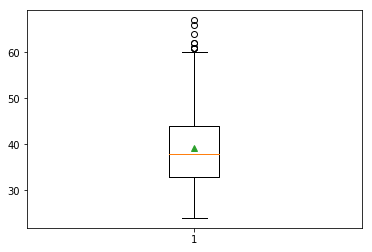

In [247]:
plt.boxplot(df.Age, showmeans=True)

In [207]:
df.to_csv("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_without_extra.csv")

# Exploration

(array([  39.,   93.,   89.,  128.,   74.,   45.,   42.,   16.,   13.,    3.]),
 array([ 24. ,  28.3,  32.6,  36.9,  41.2,  45.5,  49.8,  54.1,  58.4,
         62.7,  67. ]),
 <a list of 10 Patch objects>)

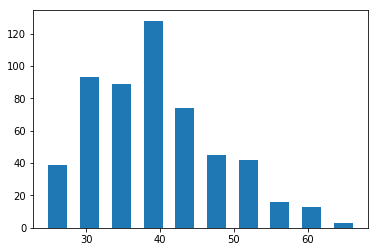

In [264]:
plt.hist(df.Age, bins=10, rwidth=0.6)


In [214]:
df.Race.unique()

array(['White', 'Hispanic', 'Black', 'Hispanic ', 'White ', 'Other'], dtype=object)

In [215]:
race = [i.strip(" ") for i in df.Race]
set(race)
df.Race = race
df.Race.unique()

array(['White', 'Hispanic', 'Black', 'Other'], dtype=object)

([<matplotlib.axis.XTick at 0x7f673f94e400>,
 <a list of 4 Text xticklabel objects>)

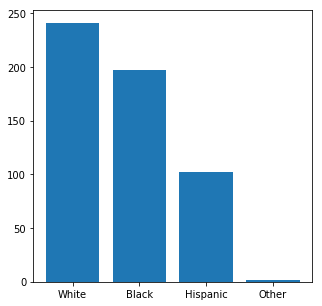

In [246]:
c = list(df.Race.value_counts())
plt.figure(figsize=(5,5))
plt.bar(range(len(c)),df.Race.value_counts())
plt.xticks(range(4),df.Race.value_counts().index)

([<matplotlib.axis.XTick at 0x7f673f8718d0>,
 <a list of 112 Text xticklabel objects>)

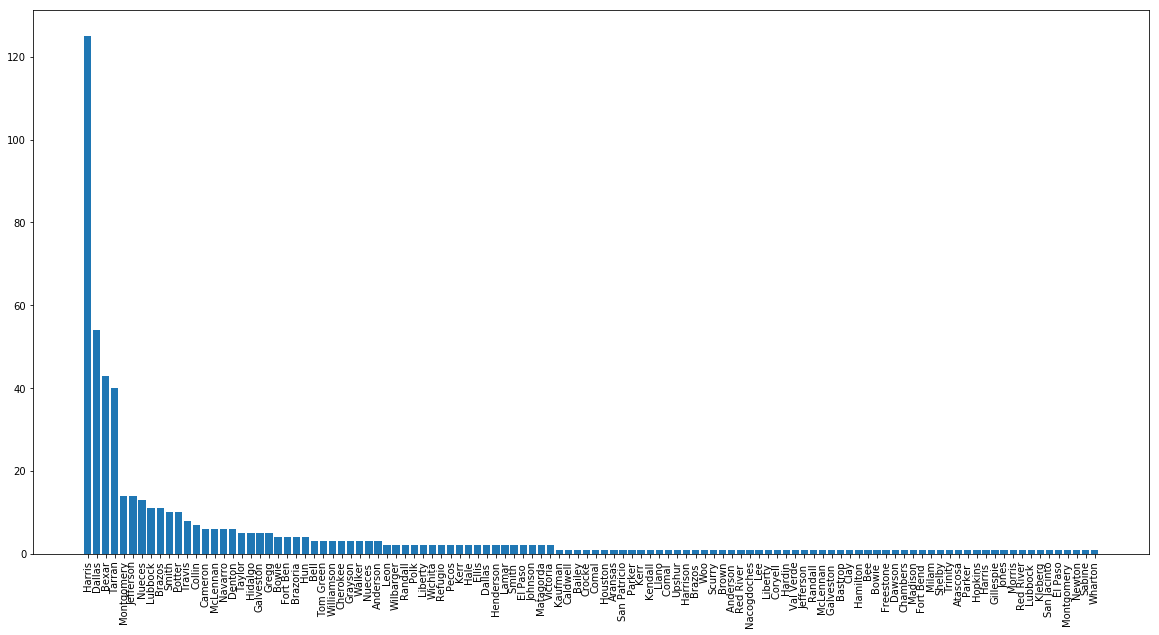

In [242]:
c = list(df.County.value_counts())
plt.figure(figsize=(20,10))
plt.bar(range(len(c)),df.County.value_counts())
plt.xticks(range(112),df.County.value_counts().index, rotation = "vertical")

Table + last statement

In [147]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_without_extra.csv")
df.head()

Execution Last Name   First Name  Age        Date      Race   County  \
0        542     Bigby        James   61   3/14/2017     White   Tarran   
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar   
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas   
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran   
4        538    Fuller       Barney   58  10/05/2016     White  Houston   

   Unnamed: 7  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [148]:
df.drop("Unnamed: 7", axis = 1, inplace=True)
df.head()

Execution Last Name   First Name  Age        Date      Race   County
0        542     Bigby        James   61   3/14/2017     White   Tarran
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran
4        538    Fuller       Barney   58  10/05/2016     White  Houston

In [149]:
df["statement"] = "-"
df.head()

Execution Last Name   First Name  Age        Date      Race   County  \
0        542     Bigby        James   61   3/14/2017     White   Tarran   
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar   
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas   
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran   
4        538    Fuller       Barney   58  10/05/2016     White  Houston   

  statement  
0         -  
1         -  
2         -  
3         -  
4         -

In [150]:
df.shape[0]

542

In [151]:
d = copy.copy(df)

In [175]:
x = glob.glob("/media/radial/Work/Work/Work on datasets/Texas DR/Statements/*.txt")
x

['/media/radial/Work/Work/Work on datasets/Texas DR/Statements/353, Charles Daniel Thacker  .txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/1, Charlie Brooks, Jr. #592.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/10, Charles Rumbaugh #555.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/100, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/101, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/102, Hai Vuong #904.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/103, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/104, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/105, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/106, No statement.txt',
 '/media/radial/Work/Work/Work on datasets/Texas DR/Statements/107, Joe F. Gonzales, Jr. #999177.t

In [176]:
for i in x:
    try:
        if( i[64]=="," and (int(i[61:64])>99) in list(d.Execution)):
            state = open(i,"r").read()
            d.statement[542-int(i[61:64])] = state
        
    except KeyError:
        ""
        
for i in x:
    try:
        if( i[63]=="," and (int(i[61:63])>9) in list(d.Execution)):
            state = open(i,"r").read()
            d.statement[542-int(i[61:63])] = state
        
    except KeyError:
        ""

for i in x:
    try:
        if( i[62]=="," and (int(i[61:62])<10) in list(d.Execution)):
            state = open(i,"r").read()
            d.statement[542-int(i[61:62])] = state
        
    except KeyError:
        ""

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [226]:
d.head(50)

Execution    Last Name   First Name  Age        Date       Race  \
0         542        Bigby        James   61   3/14/2017      White   
1         541         Ruiz      Rolando   44   3/07/2017   Hispanic   
2         540      Edwards        Terry   43   1/26/2017      Black   
3         539      Wilkins  Christopher   48  01/11/2017      White   
4         538       Fuller       Barney   58  10/05/2016      White   
5         537      Vasquez        Pablo   38  04/06/2016   Hispanic   
6         536          War         Adam   33  03/22/2016      White   
7         535     Wesbrook          Coy   58  03/09/2016      White   
8         534       Garcia      Gustavo   43  02/16/2016   Hispanic   
9         533      Freeman        James   35  01/27/2016      White   
10        532    Masterson       Richar   43  01/20/2016      White   
11        531      Holiday      Raphael   36  11/18/2015      Black   
12        530    Escamilla        Licho   33  10/14/2015   Hispanic   
13        529      Garcia          Juan   35   10/6/2015  Hispanic    
14        528        Lopez       Daniel   27  08/12/2015   Hispanic   
15        527      Russeau      Gregory   46  06/18/2015      Black   
16        526        Bower       Lester   67  06/03/2015      White   
17        525      Charles      Derrick   32  05/12/2015      Black   
18        524        Garza       Manuel   34  04/15/2015   Hispanic   
19        523      Sprouse          Ken   42  04/09/2015      White   
20        522      Vasquez       Manuel   46  03/12/2015   Hispanic   
21        521      Newbury        Donal   53  02/04/2015      White   
22        520           La        Rober   57  01/29/2015      Black   
23        519       Prieto        Arnol   42  01/21/2015   Hispanic   
24        518      Paredes       Miguel   32  10/28/2014   Hispanic   
25        517      Coleman         Lisa   38  09/17/2014      Black   
26        516      Trottie       Willie   45  09/10/2014      Black   
27        515     Villegas         Jose   39  04/16/2014   Hispanic   
28        514    Hernandez       Ramiro   44  04/09/2014   Hispanic   
29        513        Sells        Tommy   49  04/03/2014      White   
30        512        Doyle      Anthony   29  03/27/2014      Black   
31        511       Jasper          Ray   33  03/19/2014      Black   
32        510        Basso      Suzanne   59  02/05/2014      White   
33        509       Tamayo        Edgar   46  01/22/2014   Hispanic   
34        508       Martin        Jerry   43  12/03/2013      White   
35        507     McCoskey        Jamie   49  11/12/2013      White   
36        506       Yowell      Michael   43  10/09/2013     White    
37        505         Diaz       Arturo   37  09/26/2013   Hispanic   
38        504        Garza        Rober   30  09/19/2013   Hispanic   
39        503      Feldman      Douglas   55  07/31/2013      White   
40        502         Ross       Vaughn   41  07/18/2013      Black   
41        501  Quintanilla         John   36  07/16/2013   Hispanic   
42        500     McCarthy     Kimberly   52  06/26/2013      Black   
43        499      Chester        Elroy   43  06/12/2013      Black   
44        498     Williams      Jeffrey   37  05/15/2013      Black   
45        497         Parr      Carroll   35  05/07/2013      Black   
46        496         Cobb       Richar   29  04/25/2013      White   
47        495   Threadgill       Ronnie   40  04/16/2013      Black   
48        494        Lewis        Ricky   50  04/09/2013      Black   
49        493         Blue         Carl   48  02/21/2013      Black   

       County                                          statement  
0      Tarran  Yes, I do, Grace Kehler is that you? I have gi...  
1       Bexar  “Yes sir, I would first like to say to the San...  
2      Dallas  Yes, I made peace with God. I hope y'all make ...  
3      Tarran                                               None  
4     Houston  I don't have anything to say, yo

In [178]:
d.to_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_statements.xlsx")

In [179]:
len(d.statement.unique())

425

In [186]:
d.statement.value_counts()

No statement                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

IF NO STATEMENT WAS THE ONLY THING REPEATING, THEN THERE MUST BE 117 SUCH NO STATEMENTS
BUT THERE ARE ONLY 109 SUCH NO STATEMENTS AND THE ONCE THAT APPEARED TWICE ARE RARE COLLECTION OF WORDS
SOMETHING MIGHT BE MISSING OR INCORRECT

In [218]:
for i in range(len(d)):
    if(d.statement[i] == "I just ask everybody I ever hurt or done anything wrong to, to just forgive me for whatever wrongs I done to them."):
        print(i)

35
505


In [221]:
d.statement[35] = "The best time in my life is during this period. If I had to do again, I would not change a thing. I have been touched by an angel's wings. If I had it to do again, I would change Dwyer's parents suffering, because I know they are. I know that is not going to eliminate the pain, because I have a child. God, I want to say something so bad. I appreciate the people that helped me out. I appreciate the people that helped me out, and uh, know that I love you, Angel and your family and all the people that helped me out. And if this takes the pain away, so be it. I love you. I'm ready to go. "

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
for i in range(len(d)):
    if(d.statement[i] == "I hope Mrs. Howard can find peace in this."):
        print(i)

30
510


In [222]:
d.statement[30] = "This offender declined to make a last statement."

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
for i in range(len(d)):
    if(d.statement[i] == "I’m going to a beautiful place. O.K., Warden, roll ‘em."):
        print(i)

37
503


In [223]:
d.statement[37] = "I don't know if you remember back in 2000, you were happy the way it happened. You were looking for me yourself and would have taken care of me yourself. I am glad it happened this way. I wouldn't want to see you in my shoes. You would have probably been here, not me. I wouldn't wish this on you. I hope this can bring some relief to you and your family. I have no hate for you. (In Spanish): Grandmother, Lilia, and Robert; have hope for me. I am with God. Thanks for being with me and all of your love. Mom, take care of my daughter. Many kisses, Mom. Robert don't forget what I told you, I hope that this serves as an example for the youngsters. Think about it before you make a bad decision. Let's go, Warden. I'm ready. "

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
for i in range(len(d)):
    if(d.statement[i] == "Thanked his family."):
        print(i)

46
494


In [229]:
d.statement[46] = "Life is death, death is life. I hope that someday this absurdity that humanity has come to will come to and an end. Life is too short. I hope that anyone that has negative energy towards me will resolve that. Life is too short to harbor feelings of hatred and anger. That's it."

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
for i in range(len(d)):
    if(d.statement[i] == "I don’t think so. That’s all. Go ahead. Start things rolling. <span class=\"text_italic\">(Mouthed \"Hi, Mom\" to his mother.)</span>"):
        print(i)

38
502


In [231]:
d.statement[38] = "I want to thank all of my family and friends for supporting me. I love you and I'm glad that ya'll are by my side through this whole thing. I know it's hard for ya'll. I love you Jennifer, mom, Jaime, Cory, David. Thank God for you being there for me. It's not easy, this is a release. Ya'll finally get to move on with your lives. Take care of my kids and stay strong, life has to go on. We've all lost grandpas, brothers, and sisters. Support and love each other. Don't fight with each other. I love you."

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
for i in range(len(d)):
    if(d.statement[i] == "His final statement lasted 3 minutes. He thanked everybody that fought against his sentence. He spoke to his family and said he would carry their love with him.  "):
        print(i)

39
501


In [230]:
d.statement[39] = "I hereby declare, Robert Steven Everett and Nicholas Velasquez, guilty of crimes against me, Douglas Alan Feldman. Either by fact or by proxy, I find them both guilty. I hereby sentence both of them to death, which I carried out in August 1998. As of that time, the State of Texas has been holding me illegally in confinement and by force for 15 years. I hereby protest my pending execution and demand immediate relief."

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [204]:
for i in range(len(d)):
    if(d.statement[i] == "I want to say I hold no grudges. I hate no one. I love my family. Tell everyone on death row to keep the faith and don’t give up."):
        print(i)

31
509


In [233]:
d.statement[31] = "(Written statement) I just want to make a statement to all my friends, family, and supporters. Thank you all for the love. To the Christian hip-hop community, all the positive brothers I've done time with. To all the people that took the time to write a letter. Thank you. To my family, we are one. To my beautiful daughter, the best thing that ever happened to me. I love you endlessly. I am you and you are me forever. Lastly to God himself....Thank you being a gracious friend to me. I love you with all my heart, mind, strength, in Jesus name. (Spoken statement) I want to say to my family, please take care of each other, stay strong and faithful to God. I thank everyone for supporting me. Christine, I love you. To my daughter: baby, be strong, be positive, have a great life. You know what you meant to me, and I love you. Stay faithful to the Lord. Daughter, I love you, I love you, I love you. May the Lord God almighty in heaven, Jesus Christ see my spirit. Amen. "

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [209]:
for i in range(len(d)):
    if(d.statement[i] == "None. But as he lay there he did praise the Lord and seemed to be praying."):
        print(i)

43
497


In [234]:
d.statement[43] = "I just want to say I don't want you to have hate in your heart for me, because I took your loved one. I know it doesn't mean anything; I told the truth because I feel like you should know who killed your loved one. God watches everything. Don't hate me, if you do, you'll have to deal with Him later. For me, live your life but don't hate me. I'm sorry for taking your loved one. Ms. Suzy, Susan, thank you for fighting for me in the courts. Thank you for supporting me for all these years. Elroy Chester wasn't a bad man, I knew me. A lot of people say I didn't commit those murders, I really did it. That's my statement. Warden, you can go ahead. "

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [211]:
for i in range(len(d)):
    if(d.statement[i] == "This offender declined to make a last statement.  <br>\n"):
        print(i)

33
52


In [ ]:
EXCEPT FOR THE LAST ONE,OTHER SEEM REPEATED, THOSE WERE CORRECTED MANUALLY OUTSIDE NOTEBOOK. AS THEY CONVINIENTLY ADDED UP TO 540

In [235]:
d.statement.value_counts()

No statement                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [236]:
d.to_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_statements.xlsx")

In [501]:
d = pd.read_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_statements.xlsx")
d.head()

Execution Last Name   First Name  Age        Date      Race   County  \
0        542     Bigby        James   61   3/14/2017     White   Tarran   
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar   
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas   
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran   
4        538    Fuller       Barney   58  10/05/2016     White  Houston   

                                           statement  
0  Yes, I do, Grace Kehler is that you? I have gi...  
1  “Yes sir, I would first like to say to the San...  
2  Yes, I made peace with God. I hope y'all make ...  
3                                               None  
4  I don't have anything to say, you can proceed ...

In [502]:
dt = pd.read_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_without_extra_and TJ.xlsx")
dt.head()

Execution Last Name   First Name  TDCJ Numbe  Age        Date      Race  \
0        542     Bigby        James         997   61   3/14/2017     White   
1        541      Ruiz      Rolando      999145   44   3/07/2017  Hispanic   
2        540   Edwards        Terry      999463   43   1/26/2017     Black   
3        539   Wilkins  Christopher      999533   48  01/11/2017     White   
4        538    Fuller       Barney      999481   58  10/05/2016     White   

    County  
0   Tarran  
1    Bexar  
2   Dallas  
3   Tarran  
4  Houston

In [505]:
li = list(dt["TDCJ Numbe"])
d["TDCJ"] = li
d.head()

Execution Last Name   First Name  Age        Date      Race   County  \
0        542     Bigby        James   61   3/14/2017     White   Tarran   
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar   
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas   
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran   
4        538    Fuller       Barney   58  10/05/2016     White  Houston   

                                           statement    TDCJ  
0  Yes, I do, Grace Kehler is that you? I have gi...     997  
1  “Yes sir, I would first like to say to the San...  999145  
2  Yes, I made peace with God. I hope y'all make ...  999463  
3                                               None  999533  
4  I don't have anything to say, you can proceed ...  999481

In [506]:
d.to_excel("/media/radial/Work/Work/Work on datasets/Texas DR/dataframe_with_statements_without_extra.xlsx")

# Statement analysis

In [571]:
st = list(d.statement)
sts = []
for i in st:
    sts.extend(i.split(" "))
sts

['Yes,',
 'I',
 'do,',
 'Grace',
 'Kehler',
 'is',
 'that',
 'you?',
 'I',
 'have',
 'given',
 'Warden',
 '',
 'Jones',
 'a',
 'written',
 'statement',
 'that',
 'will',
 'explain',
 'a',
 'lot',
 'more.',
 'I',
 'hope',
 'this',
 'will',
 'bring',
 '',
 'you',
 'closure',
 'and',
 'answers',
 'to',
 'some',
 'questions.',
 'I',
 'hope',
 'this',
 'will',
 'bring',
 'you',
 'peace',
 'and',
 '',
 "I'm",
 'sorry',
 'for',
 'all',
 'the',
 'pain',
 'and',
 'suffering.',
 "I'm",
 'sorry',
 'it',
 'went',
 'on',
 'for',
 'a',
 'terribly',
 '',
 'long',
 'time.',
 "I'm",
 'sorry',
 'to',
 'you',
 'especially',
 'Grace',
 'Kehler.',
 'To',
 'the',
 'Kehler,',
 'Johnson',
 'and',
 '',
 'Crain',
 'family,',
 'I',
 'pray',
 'that',
 'you',
 "won't",
 'hate',
 'Jesus,',
 'the',
 'letter',
 'will',
 'explain',
 'more.',
 '',
 "I'm",
 'sorry.',
 "I'm",
 'sorry.',
 'I',
 'hope',
 'that',
 'my',
 'death',
 'will',
 'bring',
 'you',
 'peace',
 'and',
 'closure.',
 'I',
 '',
 'pray',
 'that',
 'maybe'

In [628]:
st

["Yes, I do, Grace Kehler is that you? I have given Warden  Jones a written statement that will explain a lot more. I hope this will bring  you closure and answers to some questions. I hope this will bring you peace and  I'm sorry for all the pain and suffering. I'm sorry it went on for a terribly  long time. I'm sorry to you especially Grace Kehler. To the Kehler, Johnson and  Crain family, I pray that you won't hate Jesus, the letter will explain more.  I'm sorry. I'm sorry. I hope that my death will bring you peace and closure. I  pray that maybe someday will bring you peace. I hope that you could forgive me,  but if you don't I understand. I don't think I could forgive anyone who would  of killed my children. I'm sorry for your suffering you've had for a long time.  I'm sorry, I'm sorry. I love you Lord Jesus, Lord Jesus.",
 '“Yes sir, I would first like to say to the Sanchez family  how sorry I am.&nbsp; Words cannot begin to express how sorry&nbsp; I am and  the hurt that I have 

In [261]:
from collections import defaultdict
word_counts = defaultdict(int)
for word in sts:
    word_counts[word] += 1
word_counts

defaultdict(int,
            {'': 1705,
             'outlaw': 1,
             'helper': 1,
             'Mason,': 1,
             'explain': 4,
             'Last': 3,
             'Alba,': 2,
             'care.': 10,
             'friend.': 4,
             "y'all": 42,
             'along': 2,
             'Myself': 1,
             'forever': 3,
             'be': 257,
             "I'd": 9,
             'Bianca': 1,
             'victim’s': 5,
             'Chong,': 1,
             'river.': 1,
             'Franciscan,': 1,
             'return.': 5,
             'became': 1,
             'my': 760,
             'apology,': 1,
             'remembering': 1,
             'power.': 4,
             "I'll": 37,
             'hero,': 1,
             'Ailsa,': 1,
             'clean': 1,
             'oneself': 1,
             'wrong': 16,
             'alone.': 2,
             'friendship.': 4,
             'ahh.': 1,
             'Romans': 4,
             'breath,': 1,
             'n

In [269]:
sorted_dict = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_dict

[('I', 2976),
 ('', 1705),
 ('to', 1387),
 ('and', 1204),
 ('you', 1066),
 ('the', 1064),
 ('my', 760),
 ('for', 716),
 ('that', 645),
 ('love', 625),
 ('of', 580),
 ('all', 475),
 ('am', 459),
 ('have', 439),
 ('is', 426),
 ('a', 418),
 ('in', 404),
 ('me', 349),
 ('know', 282),
 ('your', 281),
 ('will', 265),
 ('be', 257),
 ('not', 256),
 ('you.', 254),
 ('this', 242),
 ('want', 216),
 ('it', 208),
 ('would', 207),
 ('with', 205),
 ('me.', 201),
 ('like', 196),
 ('what', 187),
 ('on', 166),
 ('are', 161),
 ('family', 155),
 ('God', 153),
 ('thank', 150),
 ('was', 148),
 ('hope', 143),
 ('but', 139),
 ("I'm", 136),
 ('sorry', 135),
 ('just', 135),
 ('statement', 129),
 ('You', 129),
 ('forgive', 129),
 ('No', 124),
 ('say', 122),
 ('Thank', 117),
 ('going', 117),
 ('To', 115),
 ('you,', 112),
 ('we', 106),
 ('can', 104),
 ('see', 103),
 ('them', 103),
 ('do', 102),
 ('been', 100),
 ('as', 99),
 ('all.', 95),
 ('there', 93),
 ('who', 93),
 ("don't", 92),
 ('no', 92),
 ('did', 91),
 ('t

# all these are perfect words, which might not include small changes

##love,family, GOd, Hope, Sorry,Forgive,Thank,Lord,Pain,Jesus,Peace,Pray,apologize,bless, friends,Father,Christ,Allah,Mr., Ms.,mercy,Amen,Justice,sister, mother, heaven,mom,sprit,wife,kids,baby,brother,mrs.,son,soul,Texas, police,Irene,innocent,daughter,clousre,art,Jack,Holy,sins,mama,heavenly,free,America,Polunsky,spiritual,bye,angry,Robert,truth,bobby,boswell,Donna,lawyers,cildren,David

In [635]:
count =0
for i in st:
    exp =  ' [l|L]ov'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

277

In [616]:
count =0
for i in st:
    exp =  'eace.*?'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

67

In [599]:
count =0
for i in st:
    exp =  '[f|F]amil.*?'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

195

In [634]:
count =0
for i in st:
    exp =  ' [m|M]om | [m|M]ama | [m|M]other | [m|M]omma'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

47

In [641]:
count =0
for i in st:
    exp =  ' [p|P]apa| my father' #had to do this as father means god too
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1

count

3

In [650]:
count =0
for i in st:
    exp =  ' [s|S]on | [d|D]aughter] |[c|c]hildren' #had to do this as father means god too
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

27

In [646]:
count =0
for i in st:
    exp =  ' [g|G]od | Father'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

116

In [637]:
count =0
for i in st:
    exp =  ' [h|H]ope.*?'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

93

In [638]:
count =0
for i in st:
    exp =  ' [s|S]orry.*?'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

126

In [640]:
count =0
for i in st:
    exp =  ' .orgiv.*?'
    pattern = re.compile(exp)
    word = re.findall(pattern,i)
    if(word!=[]):
        count=count+1
count

110

# Combinig it all for final showdown

In [651]:
compdf = pd.read_excel("/media/radial/Work/Work/Work on datasets/Texas DR/main_dataframe_with_info_img_text.xlsx")
compdf.shape

(542, 31)

In [652]:
compdf.head()

Execution Last Name   First Name  Age        Date    Race_x County_x  \
0        542     Bigby        James   61   3/14/2017     White   Tarran   
1        541      Ruiz      Rolando   44   3/07/2017  Hispanic    Bexar   
2        540   Edwards        Terry   43   1/26/2017     Black   Dallas   
3        539   Wilkins  Christopher   48  01/11/2017     White   Tarran   
4        538    Fuller       Barney   58  10/05/2016     White  Houston   

                                           statement    TDCJ  \
0  Yes, I do, Grace Kehler is that you? I have gi...     997   
1  “Yes sir, I would first like to say to the San...  999145   
2  Yes, I made peace with God. I hope y'all make ...  999463   
3                                               None  999533   
4  I don't have anything to say, you can proceed ...  999481   

                       Name  \
0                       NaN   
1                       NaN   
2            Edwards, Terry   
3       Wilkins, Christophe   
4  Fuller Jr., Barney Ronal   

                         ...                          Weigh Eye Colo  \
0                        ...                            NaN      NaN   
1                        ...                            NaN      NaN   
2                        ...                            157     Brow   
3                        ...                          196 l     Gree   
4                        ...                            225     Brow   

   Native County Native State  \
0            NaN          NaN   
1            NaN          NaN   
2           Dall          Tex   
3  Harris County          Tex   
4          Summi         Ohio   

                                      Prior Occupati  \
0                                                NaN   
1                                                NaN   
2                   Warehouseman,  Carpenter, Labore   
3  Truck  Driver, Backhoe Operator, Welder\'s Hel...   
4                                             Labore   

                                  Prior Prison Recor  \
0                                                NaN   
1                                                NaN   
2  #807214  on a 7 year sentence from Dallas   Co...   
3                                              None.   
4                                               None   

                                     Summary of Inci     Co-Defend  \
0                                                NaN           NaN   
1                                                NaN           NaN   
2  On  July 8, 2002 in Dallas, Edwards and co-def...  Kirk  Edward   
3  On  10/28/2005 in Tarrant County,   Texas, the...          None   
4  On  05/14/2003 in Houston County, Texas, Fulle...          None   

                           Race and Gender of Victim  \
0                                                NaN   
1                                                NaN   
2                   Unknown  male and Unknown female   
3  33  year old hispanic male and 40 year old bla...   
4                     White  Male &amp; White Female   

                                                Cont  
0  Nun: Jams: Eula]; B'ghx ER. 0! 221\n0 DOB m Ru...  
1  Name Eg mﬂ RI"; 11 “R. “M\n\nDOB 911931]; Rece...  
2                                                NaN  
3                                                NaN  
4                                                NaN  

[5 rows x 31 columns]

In [653]:
compdf.columns

Index(['Execution', 'Last Name', 'First Name', 'Age', 'Date', 'Race_x',
       'County_x', 'statement', 'TDCJ', 'Name', 'Date of Birth',
       'Date Receive', 'Age (when    Received)',
       'Education Level (Highest Grade Completed)', 'Date of Offense',
       'Age (at the time    of Offense)', 'County_y', 'Race_y', 'Gende',
       'Hair Colo', 'Heigh', 'Weigh', 'Eye Colo', 'Native County',
       'Native State', 'Prior Occupati', 'Prior Prison Recor',
       'Summary of Inci', 'Co-Defend', 'Race and Gender of Victim', 'Cont'],
      dtype='object')

In [654]:
compdf.describe()

Execution         Age           TDCJ  Age (when    Received)  \
count  542.000000  542.000000     542.000000              153.000000   
mean   271.500000   39.315498  514754.352399               28.620915   
std    156.606194    8.470352  499468.940527                7.450721   
min      1.000000   24.000000     511.000000               18.000000   
25%    136.250000   33.000000     807.250000               23.000000   
50%    271.500000   38.000000  999012.500000               28.000000   
75%    406.750000   44.000000  999243.750000               34.000000   
max    542.000000   67.000000  999555.000000               51.000000   

       Age (at the time    of Offense)  
count                       153.000000  
mean                         27.006536  
std                           7.365904  
min                          17.000000  
25%                          21.000000  
50%                          25.000000  
75%                          32.000000  
max                          50.000000

In [655]:
compdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 31 columns):
Execution                                    542 non-null int64
Last Name                                    542 non-null object
First Name                                   542 non-null object
Age                                          542 non-null int64
Date                                         542 non-null object
Race_x                                       542 non-null object
County_x                                     542 non-null object
statement                                    542 non-null object
TDCJ                                         542 non-null int64
Name                                         153 non-null object
Date of Birth                                153 non-null object
Date Receive                                 153 non-null object
Age (when    Received)                       153 non-null float64
Education Level (Highest Grade Completed)    153 non

In [657]:
compdf.isnull().sum()

Execution                                      0
Last Name                                      0
First Name                                     0
Age                                            0
Date                                           0
Race_x                                         0
County_x                                       0
statement                                      0
TDCJ                                           0
Name                                         389
Date of Birth                                389
Date Receive                                 389
Age (when    Received)                       389
Education Level (Highest Grade Completed)    389
Date of Offense                              389
Age (at the time    of Offense)              389
County_y                                     389
Race_y                                       389
Gende                                        389
Hair Colo                                    391
Heigh               

In [660]:
compdf.Race_x.value_counts()

White        240
Black        197
Hispanic     101
Other          2
White          1
Hispanic       1
Name: Race_x, dtype: int64

In [ ]:
# a lot of cleaning has to be done from here since the format and units are not the same in the same column